In [2]:
!pip install neurokit2
import pandas as pd
import os
import numpy as np
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.7 MB/s eta 0:00:00a 0:00:01


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
path = '/kaggle/input/ecg-file/045_0-500000_corrected.csv'
df = pd.read_csv(path)
# df.head()

In [5]:
peak = df[df['Label']==1]
not_peak = df[df['Label']==0]

print("Peak : {}".format(len(peak)))
print("Not Peak : {}".format(len(not_peak)))

Peak : 644
Not Peak : 499356


# Calculating Sampling Rate

In [6]:
total_data_points = len(df)  # Total number of data points
total_duration = df['Time'].iloc[-1] - df['Time'].iloc[0]  # Total duration in seconds

# Calculate the sampling rate
sampling_rate = total_data_points / total_duration
print("Sampling rate:", sampling_rate, "Hz")

Sampling rate: 4807.692307692308 Hz


In [7]:
def test_neur_diff_sampR(sampling_rate):
    raw_array = df['Raw'].to_numpy()
    signal, info = nk.ecg_process(raw_array, sampling_rate=sampling_rate)
    act_r = df['Label']
    # signal.head()
    pred_r = signal['ECG_R_Peaks']
    data = df.copy()
    data['pred'] = signal['ECG_R_Peaks']
    # data['clean_volt'] = signal['ECG_Clean']
    # data
    #since the neurokit predicts the correct R peaks at a sampling rate of 1000Hz with small variations in the voltage
    # we are defining a threshold to evaluate the model
    th = [1,2,3]
    for i in range(len(act_r)):
        if pred_r[i] == act_r[i]:
            continue
        else:
            for x in th:
                if (pred_r[i]== act_r[i+x]) or (pred_r[i] == act_r[i-x]):
                    pred_r[i] = act_r[i]
                else:
                    continue
                    
    return signal, info, pred_r,act_r
    

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
f1_sco = []
rocccc = []
mccccc = []

	**************	
1000
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.75      1.00      0.85       644

    accuracy                           1.00    500000
   macro avg       0.87      1.00      0.93    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9997797162745616
Matthews Correlation Coefficient: 0.8631581456757141


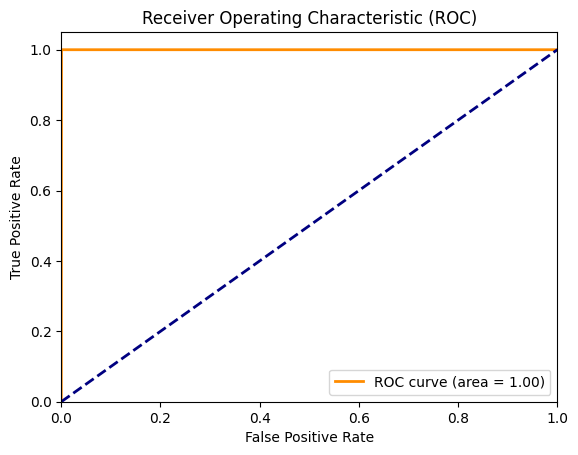

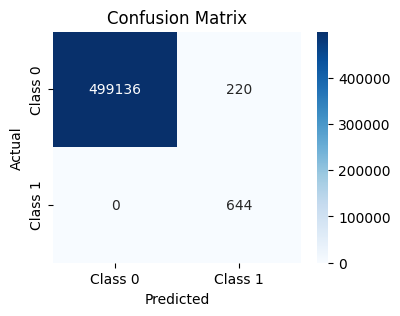

	**************	
1100
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.72      1.00      0.84       644

    accuracy                           1.00    500000
   macro avg       0.86      1.00      0.92    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9997536827433734
Matthews Correlation Coefficient: 0.8504346168273462


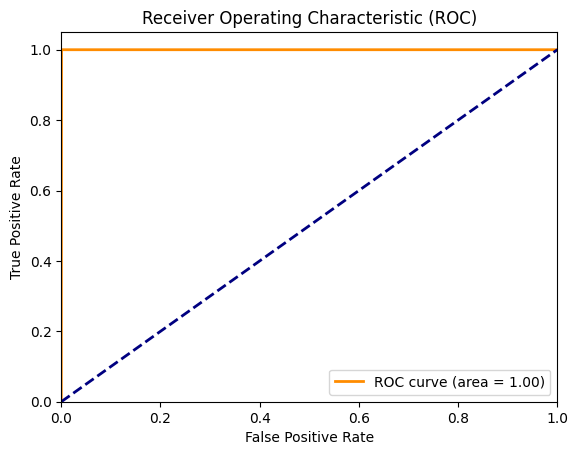

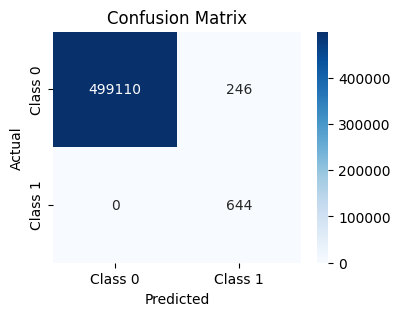

	**************	
1200
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.70      1.00      0.82       644

    accuracy                           1.00    500000
   macro avg       0.85      1.00      0.91    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.999724645343202
Matthews Correlation Coefficient: 0.8368845688049558


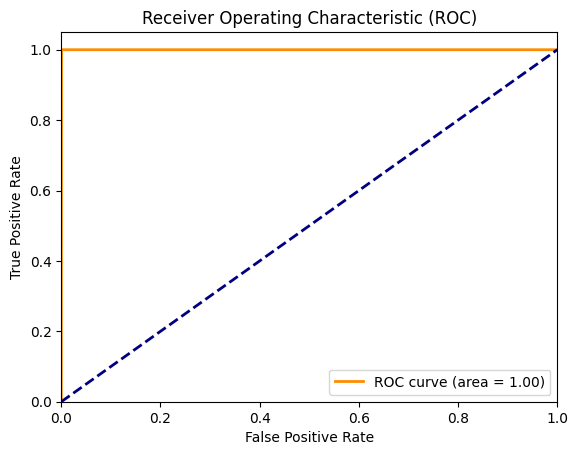

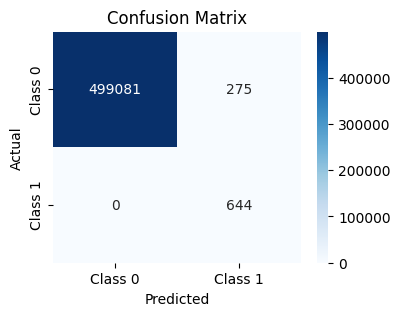

	**************	
1300
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.68      1.00      0.81       644

    accuracy                           1.00    500000
   macro avg       0.84      1.00      0.91    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9997026169706582
Matthews Correlation Coefficient: 0.8270255594227933


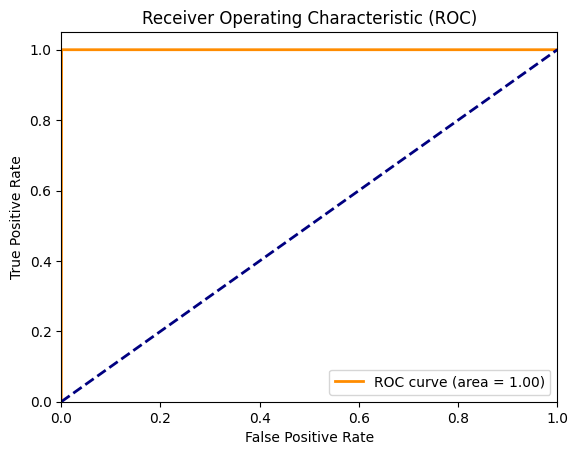

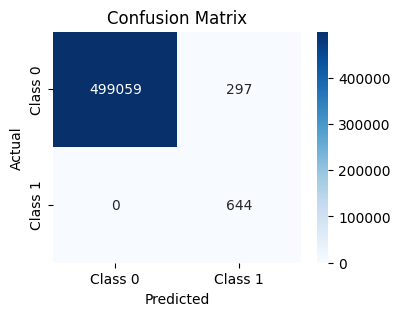

	**************	
1400
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.68      1.00      0.81       644

    accuracy                           1.00    500000
   macro avg       0.84      1.00      0.90    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9996916027843863
Matthews Correlation Coefficient: 0.8222246316813803


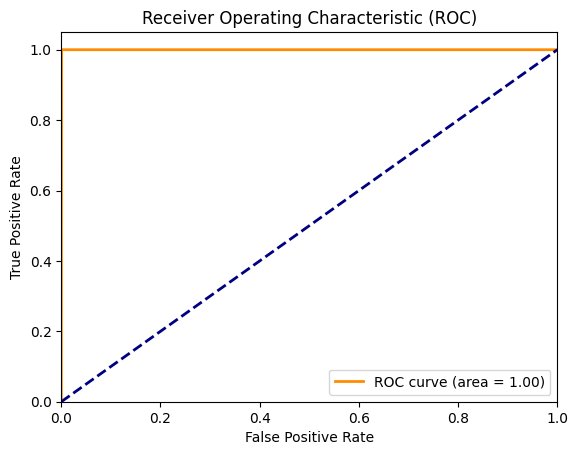

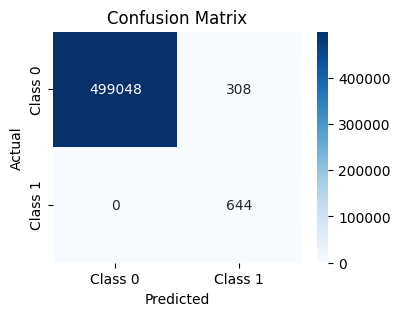

	**************	
1500
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.65      1.00      0.79       644

    accuracy                           1.00    500000
   macro avg       0.83      1.00      0.89    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9996575589359095
Matthews Correlation Coefficient: 0.8078964596799135


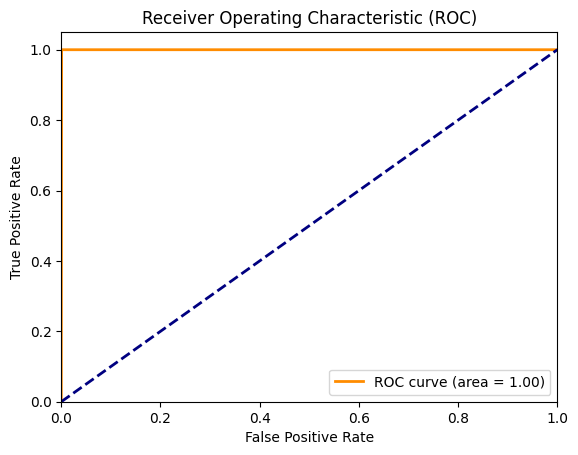

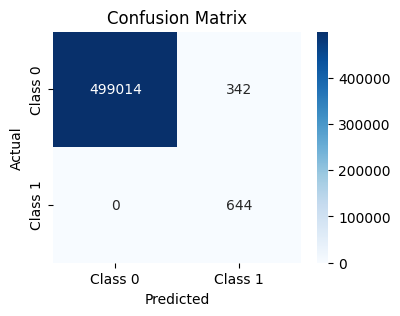

	**************	
1600
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.63      1.00      0.78       644

    accuracy                           1.00    500000
   macro avg       0.82      1.00      0.89    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9996265189564159
Matthews Correlation Coefficient: 0.7954633884569928


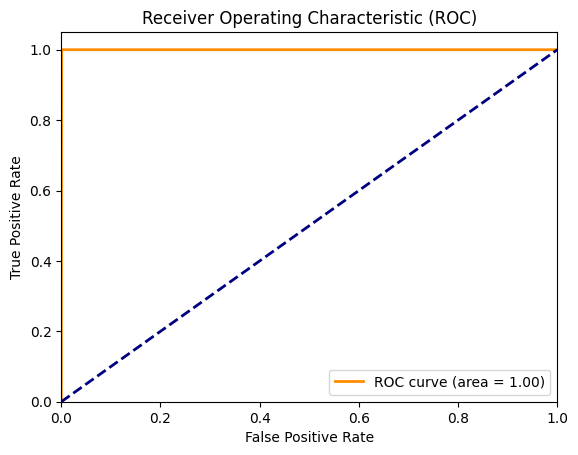

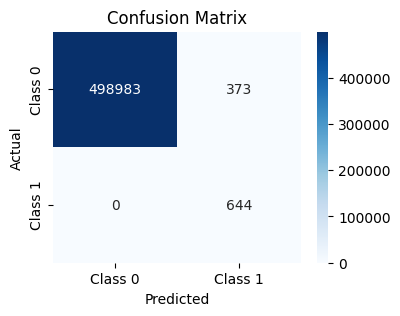

	**************	
1700
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.60      1.00      0.75       644

    accuracy                           1.00    500000
   macro avg       0.80      1.00      0.88    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9995724493147173
Matthews Correlation Coefficient: 0.7751083865760808


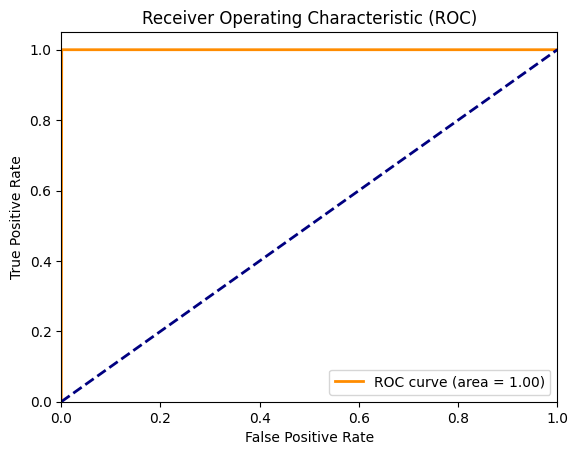

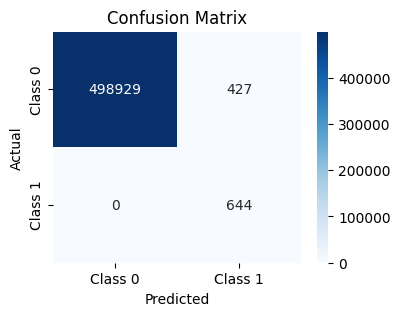

	**************	
1800
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.58      1.00      0.74       644

    accuracy                           1.00    500000
   macro avg       0.79      1.00      0.87    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9995384054662405
Matthews Correlation Coefficient: 0.7630644732019124


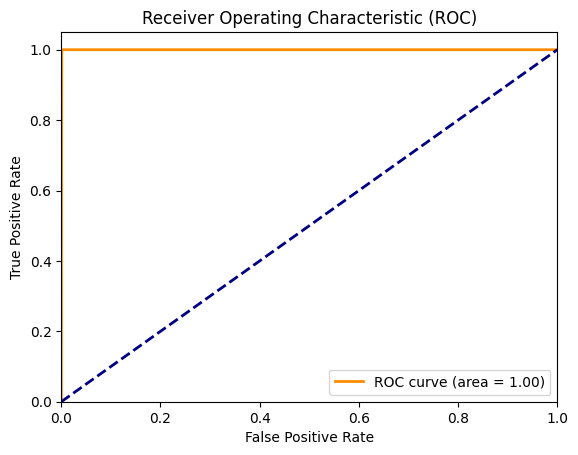

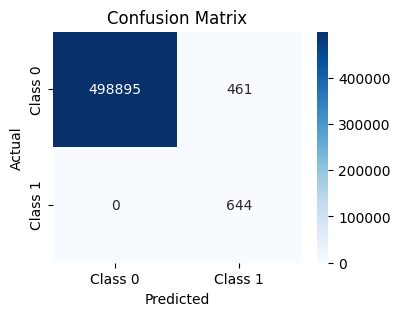

	**************	
1900
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.56      1.00      0.72       644

    accuracy                           1.00    500000
   macro avg       0.78      1.00      0.86    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9994893422728474
Matthews Correlation Coefficient: 0.7466518407340874


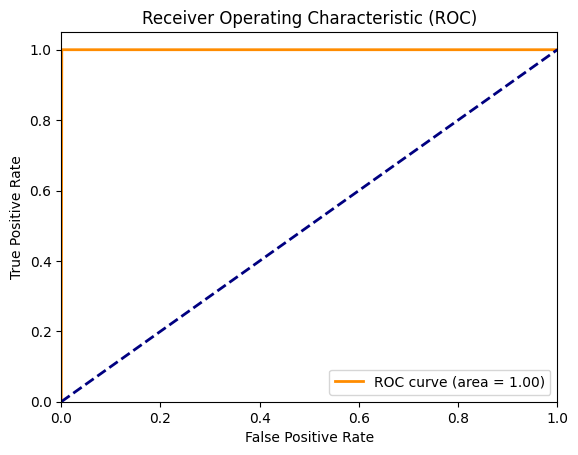

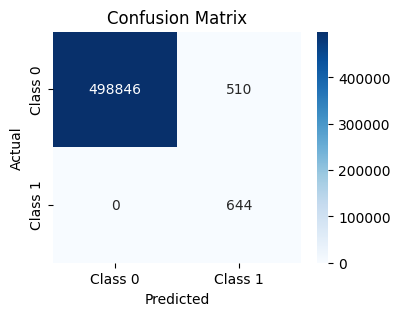

	**************	
2000
	**************	
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    499356
         1.0       0.54      1.00      0.70       644

    accuracy                           1.00    500000
   macro avg       0.77      1.00      0.85    500000
weighted avg       1.00      1.00      1.00    500000

ROC-AUC score 0.9994422816587766
Matthews Correlation Coefficient: 0.7318618022316659


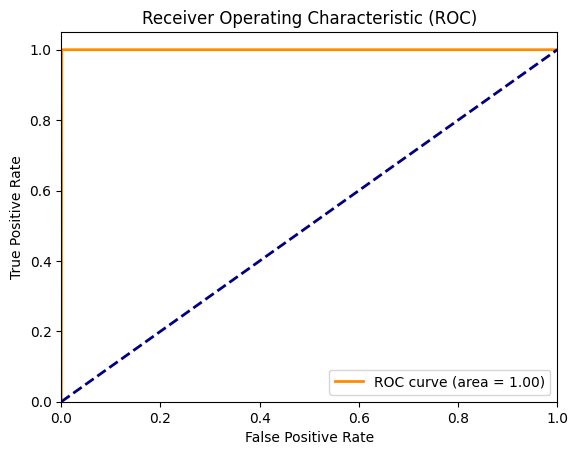

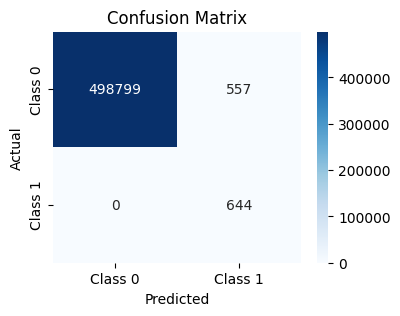

In [9]:
for rate in range(1000,2001,100):
    print("\t**************\t")
    print(rate)
    print("\t**************\t")
    signal, info, pred_r, act_r = test_neur_diff_sampR(rate)
    from sklearn.metrics import classification_report
    print(classification_report(act_r, pred_r))
    from sklearn.metrics import roc_auc_score, matthews_corrcoef
    from sklearn.metrics import roc_curve, auc
    roc_auc = roc_auc_score(act_r, pred_r)
    mcc_score = matthews_corrcoef(act_r, pred_r)
    print("ROC-AUC score", roc_auc)
    print("Matthews Correlation Coefficient:", mcc_score)
    fpr, tpr, thresholds = roc_curve(act_r, pred_r)
    roc_curvee = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_curvee)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    # Compute the confusion matrix
    cm = confusion_matrix(act_r, pred_r)

    # Define class labels (modify if needed)
    class_labels = ['Class 0', 'Class 1']

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    f1 = f1_score(act_r, pred_r)
    f1_sco.append(f1)
    rocccc.append(roc_auc)
    mccccc.append(mcc_score)

In [10]:
f1_sco

[0.8541114058355438,
 0.8396349413298565,
 0.8240563019833653,
 0.8126182965299684,
 0.8070175438596492,
 0.7901840490797546,
 0.7754364840457556,
 0.7510204081632652,
 0.73642081189251,
 0.7163515016685206,
 0.6981029810298103]

In [11]:
samp = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]

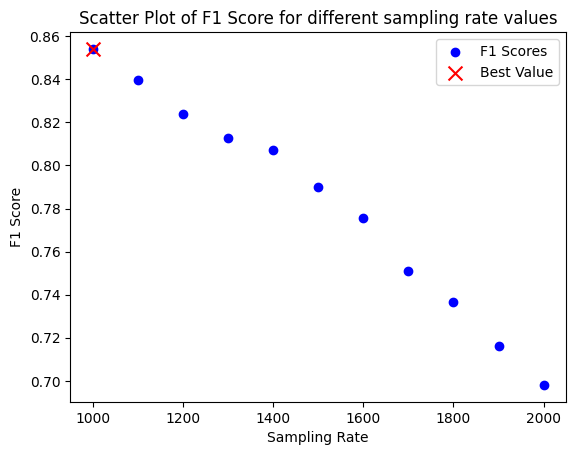

In [12]:
import matplotlib.pyplot as plt

# Sample data for X and Y
x = samp
y = f1_sco

# Create a scatter plot with dots
plt.scatter(x, y, marker='o', color='blue', label='F1 Scores')

# Highlight the point with x=1 in red
highlight_x = 1000
highlight_y = y[x.index(highlight_x)]
plt.scatter(highlight_x, highlight_y, marker='x', color='red', s=100, label='Best Value')

# Add labels and a legend
plt.xlabel('Sampling Rate')
plt.ylabel('F1 Score')
plt.legend()

# Add a title
plt.title('Scatter Plot of F1 Score for different sampling rate values')
# Show the plot
plt.show()

In [13]:
# import matplotlib.pyplot as plt

# # Sample data for X, Y, Z, and W

# x = f1_sco
# y = samp
# z = rocccc
# w = mccccc

# # Create a figure with three subplots (1 row, 3 columns)
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# # Subplot 1: Scatter plot for X and Y
# ax1.scatter(y, x, marker='o', color='blue', label='Y values as dots')
# ax1.scatter(highlight_x, highlight_y, marker='x', color='red', s=100, label='Highlighted Point (x=1)')
# ax1.set_xlabel('X values')
# ax1.set_ylabel('Y values')
# ax1.legend()
# ax1.set_title('Scatter Plot for X and Y')

# # Subplot 2: Scatter plot for Z and Y
# ax2.scatter(y, z, marker='s', color='green', label='Y values as squares')
# highlight_z = 1000
# highlight_y_z = y[z.index(highlight_z)]
# ax2.scatter(highlight_z, highlight_y_z, marker='^', color='purple', s=100, label='Highlighted Point (z=5)')
# ax2.set_xlabel('Z values')
# ax2.set_ylabel('Y values')
# ax2.legend()
# ax2.set_title('Scatter Plot for Z and Y')

# # Subplot 3: Scatter plot for W and Y
# ax3.scatter(y, w, marker='v', color='orange', label='Y values as triangles')
# highlight_w = 1000
# highlight_y_w = y[w.index(highlight_w)]
# ax3.scatter(highlight_w, highlight_y_w, marker='*', color='magenta', s=100, label='Highlighted Point (w=2)')
# ax3.set_xlabel('W values')
# ax3.set_ylabel('Y values')
# ax3.legend()
# ax3.set_title('Scatter Plot for W and Y')

# # Adjust spacing between subplots
# # plt.tight_layout()

# # Show the subplots
# plt.show()


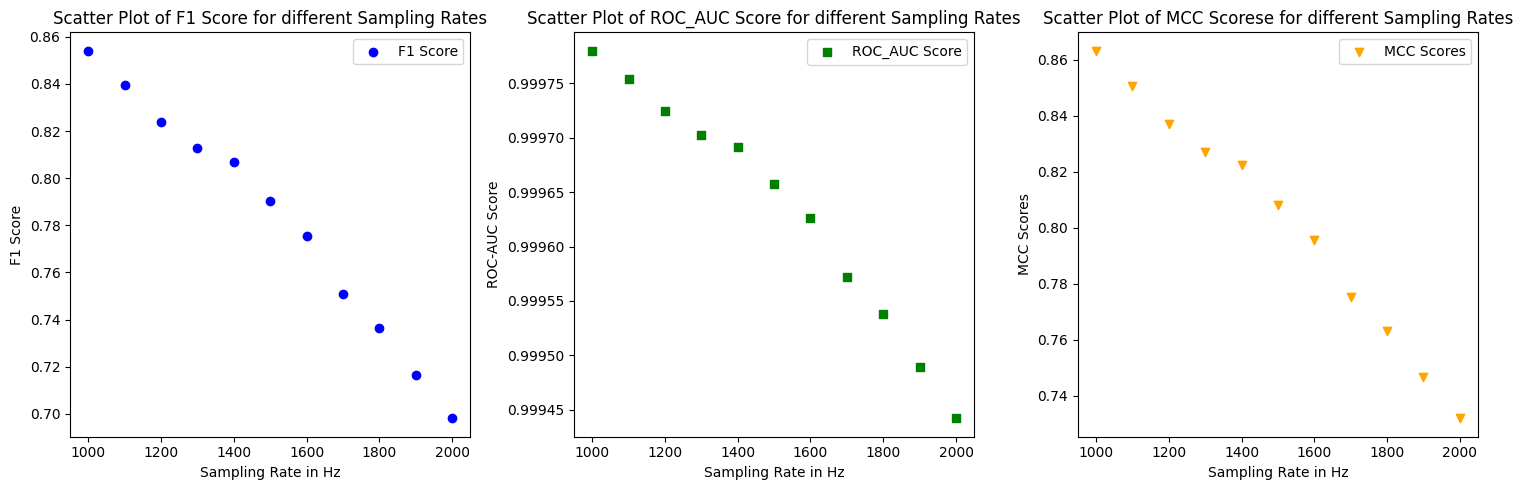

In [14]:
import matplotlib.pyplot as plt

# Sample data for X, Y, Z, and W
x = f1_sco
y = samp
z = rocccc
w = mccccc

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Subplot 1: Scatter plot for X and Y
ax1.scatter(y, x, marker='o', color='blue', label='F1 Score')
ax1.set_xlabel('Sampling Rate in Hz')
ax1.set_ylabel('F1 Score')
ax1.legend()
ax1.set_title('Scatter Plot of F1 Score for different Sampling Rates')

# Subplot 2: Scatter plot for Z and Y
ax2.scatter(y, z, marker='s', color='green', label='ROC_AUC Score')
ax2.set_xlabel('Sampling Rate in Hz')
ax2.set_ylabel('ROC-AUC Score')
ax2.legend()
ax2.set_title('Scatter Plot of ROC_AUC Score for different Sampling Rates')

# Subplot 3: Scatter plot for W and Y
ax3.scatter(y, w, marker='v', color='orange', label='MCC Scores')
ax3.set_xlabel('Sampling Rate in Hz')
ax3.set_ylabel('MCC Scores')
ax3.legend()
ax3.set_title('Scatter Plot of MCC Scorese for different Sampling Rates')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()
